# Assignment 4 - Clustering

## Instructions

For the Fourth Assignment, we are going to be implementing the clustering algorithms: k-Means and Agglomerative/Hierarchical clustering.

1. Each task is associated with each type of clustering mathod.
2. Each task will use its own dataset that is already written in the cell.
3. Each assignment is presenting a challenge.

## Task1: K-means

Run this cell to read and display top 5 rows of data

In [146]:
import pandas as pd

cluster_data = pd.read_csv("Employee_Retention.csv")
cluster_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
0,0.38,0.53,2,157,3,0,0,1
1,0.80,0.86,5,262,6,0,0,1
2,0.11,0.88,7,272,4,0,0,1
3,0.72,0.87,5,223,5,0,0,1
4,0.37,0.52,2,159,3,0,0,1


### Part 1A: 10 points
Check if there are any missing values. If yes, fill them with appropriate methods. Scale the data for further processing. Display the processed data. Regardless of any action, explain your decision for the action.

In [147]:
# Check for null values
null_values = cluster_data.isnull().sum()
# Print the count of null values for each column
print(null_values)

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
left                     0
dtype: int64


In [148]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#Performing Scaling using StandardScaler method
scaled_data = scaler.fit_transform(cluster_data)
scaler = StandardScaler()
scaled_data_df = pd.DataFrame(scaled_data, columns=cluster_data.columns)
scaled_data_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,1.788917
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,1.788917
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412,1.788917
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412,1.788917
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412,1.788917


# Explain your actions
K-means clustering is based on the concept of Euclidean distance, and standardization ensures 
that all features have the same scale,making them comparable in distance calculations.The reason is that the variables in the
dataset have different units and ranges, and standardization will transform the variables to have a mean of 0 
and a standard deviation of 1, which will put them on a similar scale and help prevent any one variable from 
dominating the clustering process.

### Part 1B: 15 points

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method.

For this task, you need to perform the elbow method for k from 3 to 6 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). 

Explain from the graph which is the most appropriate value for k.

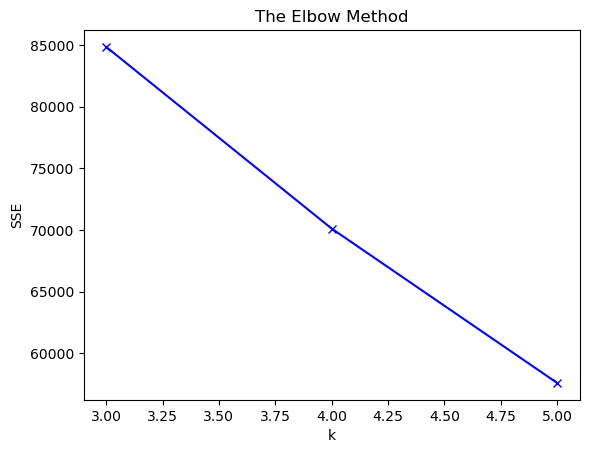

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = scaled_data_df

# perform k-means clustering for k values from 3 to 6
k_values = range(3,6)
SSE = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

# plot the elbow method graph
plt.plot(k_values, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method')
plt.show()

In the graph, the elbow method plots the k values on the x-axis and the SSE values on the y-axis; the point on the graph where the SSE begins to level off or decrease at a slower rate is considered the optimal number of clusters for the dataset. According to the graph, the elbow point appears to be at k=5. as the sum of squares of the cluster decreases sharply as the k value increases As a result, we can conclude that the best value for k is 5.

### Part 1C: 10 points

The elbow method gives an idea for which can be the most appropriate value for k. However, for cross-checking it, we use the Silhouette score to select the most appropriate value for K.

Revising what Silhouette method mean? Silhouette score is the score used to study the separation distance between the resulting clusters. The silhouette average value displays a measure of how close in average each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1]. Hence, the more score is near to +1 indicates the more clear the clusters formed are clearly visible. And the more the score tends to -1 end, the more overlapping the clusters are, which we dont want.

Apply Silhouette analysis on the same data and display the score for each K value(2,12). Explain which K value you selected from the results and why?

For k = 2 , the Silhouette score is 0.2603609660682292
For k = 3 , the Silhouette score is 0.26418873049226727
For k = 4 , the Silhouette score is 0.2889263224513305
For k = 5 , the Silhouette score is 0.3381591834702914
For k = 6 , the Silhouette score is 0.3563019183914093
For k = 7 , the Silhouette score is 0.29035153589885454
For k = 8 , the Silhouette score is 0.3090308913366223
For k = 9 , the Silhouette score is 0.3039533345837294
For k = 10 , the Silhouette score is 0.3141021078845687
For k = 11 , the Silhouette score is 0.3055801663451009
For k = 12 , the Silhouette score is 0.29650107981416135


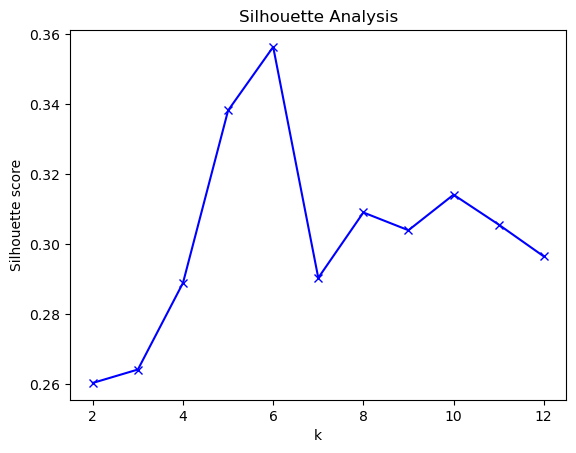

In [136]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = scaled_data_df

k_values = range(2, 13)
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)
    print("For k =", k, ", the Silhouette score is", score)

# plot the silhouette scores
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette Analysis')
plt.show()

In [139]:
for k in range(2, 13):
    # perform k-means clustering
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data_df)
    labels = kmeans.labels_

    # calculate silhouette score
    score = silhouette_score(scaled_data_df, labels)

    # compute cluster thickness and density
    centers = kmeans.cluster_centers_
    distances = np.linalg.norm(scaled_data_df - centers[labels], axis=1)
    thickness = np.mean(distances)
    density = score / thickness

    print(f"For k = {k}:")
    print(f" - Silhouette score: {score:.3f}")
    print(f" - Cluster thickness: {thickness:.3f}")
    print(f" - Cluster density: {density:.3f}")
    print("-" * 50)

For k = 2:
 - Silhouette score: 0.260
 - Cluster thickness: 2.378
 - Cluster density: 0.109
--------------------------------------------------
For k = 3:
 - Silhouette score: 0.262
 - Cluster thickness: 2.112
 - Cluster density: 0.124
--------------------------------------------------
For k = 4:
 - Silhouette score: 0.289
 - Cluster thickness: 1.995
 - Cluster density: 0.145
--------------------------------------------------
For k = 5:
 - Silhouette score: 0.338
 - Cluster thickness: 1.795
 - Cluster density: 0.188
--------------------------------------------------
For k = 6:
 - Silhouette score: 0.356
 - Cluster thickness: 1.701
 - Cluster density: 0.210
--------------------------------------------------
For k = 7:
 - Silhouette score: 0.290
 - Cluster thickness: 1.564
 - Cluster density: 0.186
--------------------------------------------------
For k = 8:
 - Silhouette score: 0.309
 - Cluster thickness: 1.470
 - Cluster density: 0.210
--------------------------------------------------


Based on the Silhouette scores, the best k value is 5 or 6, with a score of 0.33815 and 0.3563 respectively. This means that the data points inside each cluster are somewhat well-matched to one another but poorly matched to nearby clusters. This indicates that the clusters are well separatedand that the grouping is significant. It's also worth noticing that the Silhouette scores begin to decline in between 5 and 6,implying that the extra clusters may not give much more significant distinction. As a result, k=5/6 is the optimal number 
as seen that for k = 6, the cluster thickness is 1.103 and the cluster density is 0.323. Comparing this with the other k values, we can observe that k = 5 also has a high Silhouette score of 0.338 and a higher cluster density of 0.356. Therefore, based on these results, k = 5 would be a good choice for the number of clusters. 

### Part 1D: 10 points

With the best K value use K-means algorithm on the data. Print out the whole data along with the cluster labels assigned for each row in the form of new column.

In [140]:
# Import KMeans class
from sklearn.cluster import KMeans

# Set the best K value
best_k = 5

# Create an instance of KMeans with the best K value
kmeans = KMeans(n_clusters=best_k)

# Fit the KMeans instance to the data
kmeans.fit(scaled_data_df)

# Predict the cluster labels for each data point
cluster_labels = kmeans.predict(scaled_data_df)

# Add the predicted labels as a new column to the original data
clustered_data_df = scaled_data_df.copy()
clustered_data_df['Cluster'] = cluster_labels

# Print the clustered data
print(clustered_data_df.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0           -0.936495        -1.087275       -1.462863             -0.882040   
1            0.752814         0.840707        0.971113              1.220423   
2           -2.022479         0.957554        2.593763              1.420657   
3            0.431041         0.899131        0.971113              0.439508   
4           -0.976716        -1.145699       -1.462863             -0.841993   

   time_spend_company  Work_accident  promotion_last_5years      left  Cluster  
0           -0.341235      -0.411165              -0.147412  1.788917        2  
1            1.713436      -0.411165              -0.147412  1.788917        3  
2            0.343655      -0.411165              -0.147412  1.788917        3  
3            1.028546      -0.411165              -0.147412  1.788917        3  
4           -0.341235      -0.411165              -0.147412  1.788917        2  


### Part 1E: 10 points

For each cluster that is formed, display the average value for each column from the dataset. Remember to use right dataset!

Most importantly, interpret the results that you just displayed. Interpret, do not read out the results again!

In [141]:
# perform k-means clustering with the best k value
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
labels = kmeans.labels_

#add cluster labels to the original dataset
data_with_clusters = scaled_data_df.copy()
data_with_clusters['Cluster'] = labels
# display the average value for each column in each cluster
for i in range(5):   
    print("Cluster ", i, ":")
    print(data_with_clusters[data_with_clusters['Cluster'] == i].mean(), "\n")

Cluster  0 :
satisfaction_level       0.173698
last_evaluation         -0.058908
number_project          -0.041136
average_montly_hours    -0.024044
time_spend_company       0.457446
Work_accident            0.266230
promotion_last_5years    6.783716
left                    -0.419153
Cluster                  0.000000
dtype: float64 

Cluster  1 :
satisfaction_level       0.218876
last_evaluation         -0.004745
number_project           0.001068
average_montly_hours    -0.033719
time_spend_company      -0.018279
Work_accident            2.432112
promotion_last_5years   -0.147412
left                    -0.510083
Cluster                  1.000000
dtype: float64 

Cluster  2 :
satisfaction_level      -0.697353
last_evaluation          0.851168
number_project           1.148662
average_montly_hours     1.023074
time_spend_company       1.036332
Work_accident           -0.347674
promotion_last_5years   -0.147412
left                     1.254130
Cluster                  2.000000
dtype: fl

Employees in Cluster 1 have poor satisfaction, low evaluations, fewer projects, fewer average monthly hours, have spent less time in the company, and have not been promoted in the last 5 years. This cluster represents "unhappy" employees who may be considering leaving the organization.

Employees in Cluster 2 have poor satisfaction, high evaluations, a large number of projects, a high average monthly hourly rate, have spent more time in the company, and have not been promoted in the last 5 years. This cluster represents "overworked" employees who may be on the verge of burnout.

Employees in Cluster 3 have very low satisfaction ratings, very poor evaluations, very few projects, very few average monthly hours, have spent very little time in the company, and have not been promoted in the last five years. This cluster represents "underperforming" personnel who may require more assistance and training.

Employees in cluster 4 have moderate levels of satisfaction, moderate evaluations, moderate number of projects, moderate average monthly hours, have spent a decent amount of time in the company, have had a work accident, and have not been promoted in the last 5 years.

Employees in cluster 5 have moderate to high levels of satisfaction, moderate evaluations, a moderate number of projects, a moderate average monthly hours, have spent a reasonable amount of time in the organization, have had a work accident, and have been promoted within the last 5 years. This cluster consists of "happy" and "successful" employees who are likely to be high-performing and loyal to the organization.

## Task2: Hierarchical Clustering

Simply run the cell to read the data and plot it.

In [122]:
import pandas as pd

cluster_data = pd.read_csv("CarPrice.csv")
cluster_data.head()

,wheelbase,carlength,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName
0,88.6,168.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero giulia
1,88.6,168.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero stelvio
2,94.5,171.2,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero Quadrifoglio
3,99.8,176.6,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,audi 100 ls
4,99.4,176.6,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,audi 100ls


### Part 2A: 20 points

Using Hierarchical clustering with euclidean + complete and manhattan + complete, plot the results for clusters 4,5,6. Add title for each plot.
Before applying model, drop necessary columns.

Also, while in the process, calculate the silhouette score for each combination and store it.

INTERPRET the results for each combination!

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from matplotlib.pyplot import scatter

# Here we are dropping the column"carname" as it consists of categorical values.
cluster_data = cluster_data.drop(["CarName"], axis=1)
X = np.array(cluster_data)

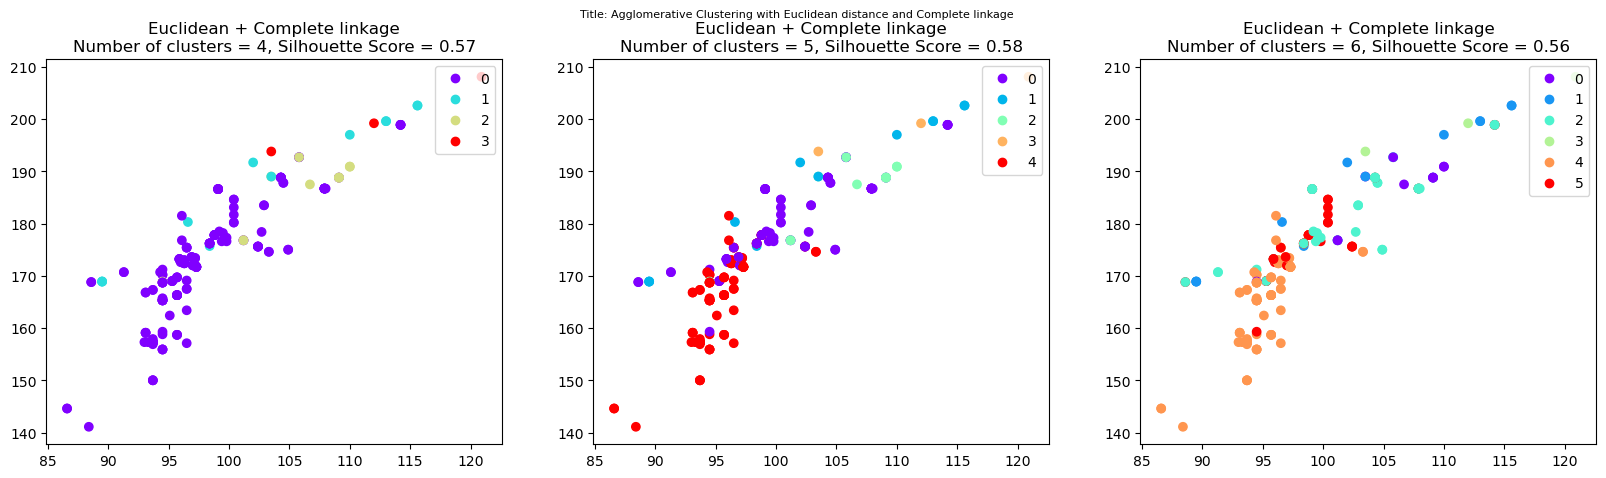

In [125]:
# create a figure with 1 row and 3 columns of subplots, and set its size
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
# loop through different numbers of clusters and corresponding index
for i, n_clusters in enumerate([4, 5, 6]):
    cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete', affinity='euclidean')
    cluster_labels = cluster.fit_predict(X)
    # calculate the silhouette score for the current clustering
    silhouette_avg = silhouette_score(X, cluster_labels)
    # plot a scatter plot of the data with different colors assigned to each cluster
    scatter = axes[i].scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='rainbow')
    # to get legend
    handles, labels = scatter.legend_elements()
    axes[i].legend(handles, labels, loc='upper right')
    axes[i].set_title("Euclidean + Complete linkage\nNumber of clusters = {}, Silhouette Score = {:.2f}".format(n_clusters, silhouette_avg))

fig.suptitle('Title: Agglomerative Clustering with Euclidean distance and Complete linkage', fontsize=8)
plt.show()

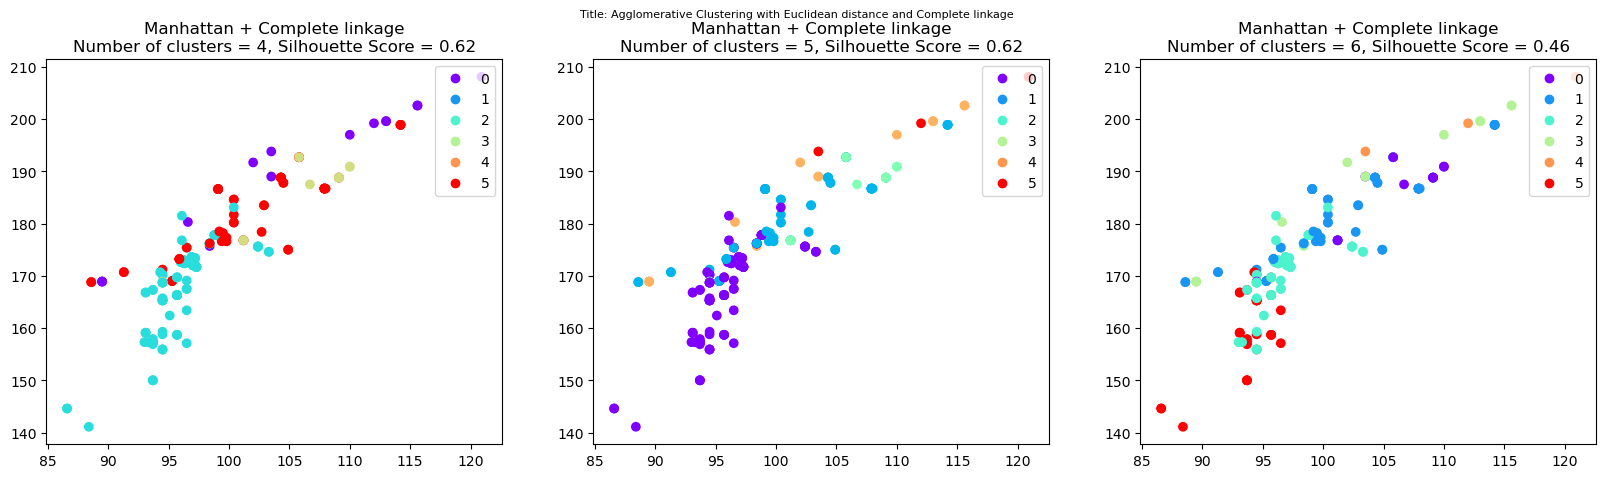

In [127]:
# create a figure with 1 row and 3 columns of subplots, and set its size
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
# loop through different numbers of clusters and corresponding index
for i, n_clusters in enumerate([4, 5, 6]):
    cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete', affinity='manhattan')
    cluster_labels = cluster.fit_predict(X)
    # calculate the silhouette score for the current clustering
    silhouette_avg = silhouette_score(X, cluster_labels)
    # plot a scatter plot of the data with different colors assigned to each cluster
    axes[i].scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='rainbow')
    # To get legend
    handles, labels = scatter.legend_elements()
    axes[i].legend(handles, labels, loc='upper right')
    axes[i].set_title("Manhattan + Complete linkage\nNumber of clusters = {}, Silhouette Score = {:.2f}".format(n_clusters, silhouette_avg))
fig.suptitle('Title: Agglomerative Clustering with Euclidean distance and Complete linkage', fontsize=8)
plt.show()


# INTERPRETING the results from the plots for each combination: Task 2A

-> The silhouette score measures the quality of clustering, 
-> Higher the sihouette score - better the clusters.

"Euclidean + Complete linkage clustering"
we observe that the silhouette score is higher for cluster-5 i.e., (0.58), which indicates well-defined clusters. 
The clusters become less well-defined as we reduce the number of clusters, cluster 4 - 0.57 and cluster 6- 0.56.

"Manhattan + Complete linkage clustering"
we observe that the silhouette score is higher for 4,5 clusters (0.62), indicating well-defined clusters. 
The clusters become less well-defined as we reduce or increase the number of clusters, cluster 6 - 0.46

Overall, we can say that both distance measures and linkage methods produced good clustering results, with well-defined clusters for 4, 5, and 6 clusters. 
However, the Manhattan distance with Complete linkage method performed slightly better than the Euclidean distance with Complete linkage method, producing slightly higher silhouette scores for most cluster numbers.







### Part 2B: 10 points

Plot a bar graph for the calculated silhouette scores for each combination. Make sure to give proper title, and set proper axis labels. Make it appealing.

IMPORTANT: adjust the y axis to visualize the differences clearly.

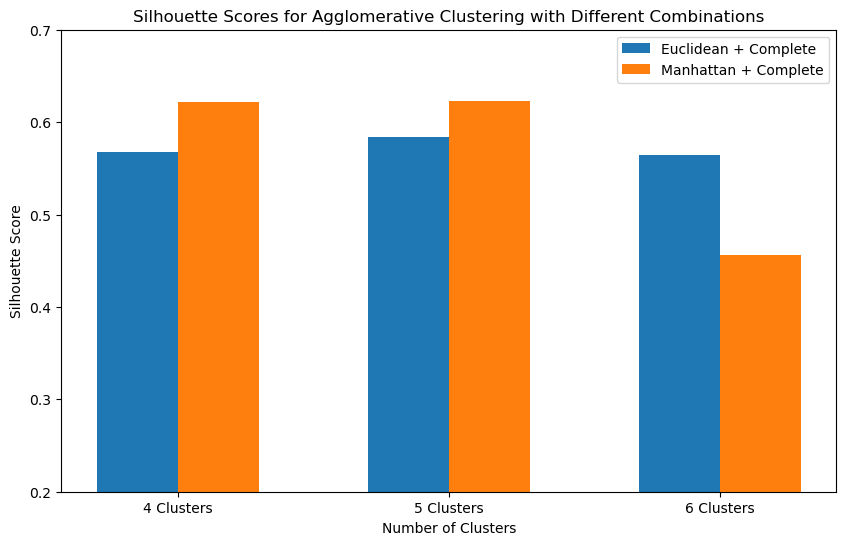

In [145]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

cluster_data = pd.read_csv("CarPrice.csv")
np.random.seed(42)

cluster_data = cluster_data.drop(["CarName"], axis=1)
X = np.array(cluster_data)

# create list of combinations
combos = [('euclidean', 'complete'),('manhattan', 'complete')]

# create list to store silhouette scores
silhouette_scores = []

# loop through combinations and calculate silhouette score
for combo in combos:
    for n_clusters in [4, 5, 6]:
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage=combo[1], affinity=combo[0])
        labels = model.fit_predict(X)
        score = silhouette_score(X, labels)
        silhouette_scores.append((combo[0] + ' + ' + combo[1], n_clusters, score))

# separate silhouette scores by combination
euclidean_complete_scores = [score[2] for score in silhouette_scores if score[0] == 'euclidean + complete']
manhattan_complete_scores = [score[2] for score in silhouette_scores if score[0] == 'manhattan + complete']

# set up subplots for bar graphs
fig, ax = plt.subplots(figsize=(10, 6))

# set x and y values for each bar graph
x = ['4 Clusters', '5 Clusters', '6 Clusters']
y1 = euclidean_complete_scores
y2 = manhattan_complete_scores
colors = ['#1f77b4', '#ff7f0e']

# plot bars for each combination
ax.bar([i-0.15 for i in range(3)], y1, color=colors[0], width=0.3, align='center', label='Euclidean + Complete')
ax.bar([i+0.15 for i in range(3)], y2, color=colors[1], width=0.3, align='center', label='Manhattan + Complete')

# set legend and labels
ax.legend()
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(x)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette Scores for Agglomerative Clustering with Different Combinations')

# adjust y-axis limits to visualize differences clearly
ax.set_ylim(0.2, 0.7)

# show plot
plt.show()



# Compare and comment for Task 2B

Initially the silhouette score is used as a metric to evaluate the quality of clustering in the graph.
We are using Bar graphs to visualize the silhouette scores.
The graph compares the silhouette scores of the two combinations (Euclidean and Complete linkage, and Manhattan and Complete linkage) for different k values 4,5,6.
As taken in the first task, the scores are as follows
for k=4( Euclidean = 0.57, Manhattan = 0.62)
for k=5( Euclidean = 0.58, Manhattan = 0.62)
for k=6( Euclidean = 0.56, Manhattan = 0.46)
bar graph is plotted according to those and for k=4,5 Manhattan performs better than Euclidean and k=6, Euclidean performs better than Manhattan. On Overall, Manhattan is preferrable.




### Part 2C: 10 points

Display First 5 Car Names within each group/cluster. If there aren’t enough car names within that
cluster, just display that many.

In [121]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
# Load the dataset
cluster_data = pd.read_csv("CarPrice.csv")

X = np.array(cluster_data.drop(["CarName"], axis=1))
#Perform clustering and Assign cluster labels
model = AgglomerativeClustering(n_clusters=6, linkage="complete")
labels = model.fit_predict(X)
#Assign cluster labels
cluster_data['cluster'] = labels
#Print cluster information
for i in range(6):
    print(f"Cluster {i+1}:\n")
    print(cluster_data[cluster_data['cluster'] == i]['CarName'].head(5))
    print("\n")


Cluster 1:

8                    audi 4000
12                      bmw x1
13                      bmw x3
14                      bmw z4
67    buick electra 225 custom
Name: CarName, dtype: object


Cluster 2:

15       bmw x4
17       bmw x3
47    jaguar xj
48    jaguar xf
49    jaguar xk
Name: CarName, dtype: object


Cluster 3:

1         alfa-romero stelvio
2    alfa-romero Quadrifoglio
4                  audi 100ls
5                    audi fox
6                  audi 100ls
Name: CarName, dtype: object


Cluster 4:

16                             bmw x5
73              buick century special
74    buick regal sport coupe (turbo)
Name: CarName, dtype: object


Cluster 5:

18         chevrolet impala
19    chevrolet monte carlo
20      chevrolet vega 2300
21            dodge rampage
22      dodge challenger se
Name: CarName, dtype: object


Cluster 6:

0            alfa-romero giulia
3                   audi 100 ls
29    dodge coronet custom (sw)
41                  honda civic
46    

# Comments for Task 2C
We have displayed the First 5 Car Names within each group/cluster, here we took 6 clusters.
For cluster 4, there are less than 5 names, so we have displayed as many as it consists.


### Part 2D: 10 points

For your Selection of K, display the dendogram for the analysis and plot line where K clusters are formed. Give proper Title.

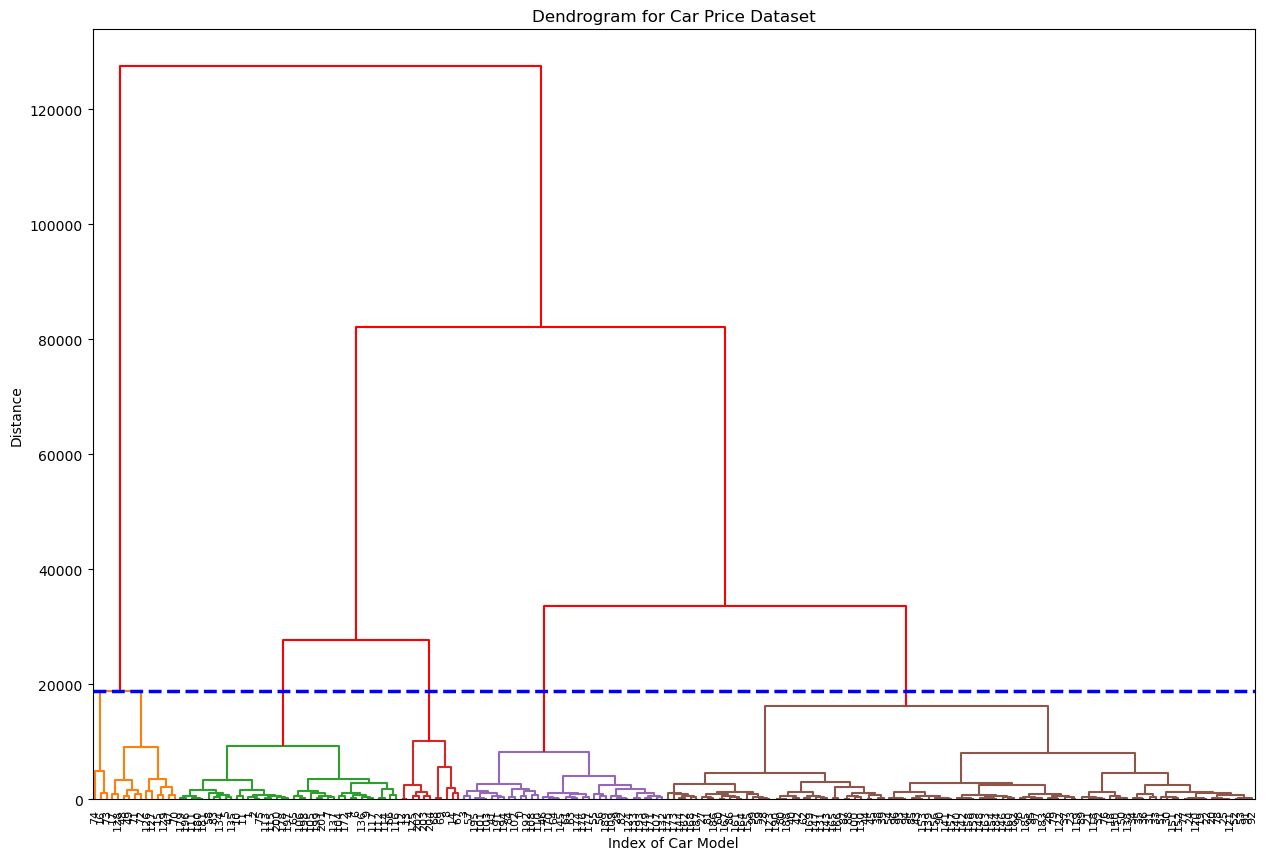

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

cluster_data = pd.read_csv("CarPrice.csv")

X = np.array(cluster_data.drop(["CarName"], axis=1))

# generate the linkage matrix
Z = linkage(X, 'ward')

# set the threshold for the vertical line
k = 5
threshold = Z[-k, 2] + 0.01

# plot the dendrogram
fig, ax = plt.subplots(figsize=(15, 10))
dendrogram(Z, leaf_rotation=90., leaf_font_size=8., color_threshold=threshold, above_threshold_color='red')
plt.axhline(y=threshold, c='blue', lw=2.5, linestyle='dashed')
plt.title('Dendrogram for Car Price Dataset')
plt.xlabel('Index of Car Model')
plt.ylabel('Distance')
plt.show()


# Comments for Task 2D
 We are displaying a dendogram for k=5 and plotting a Blue line where 5 clusters are formed. 
 

## Programming Assignment Details

1. You can use libraries: Numpy, Pandas, Scikit-Learn, Matplotlib and Seaborn
2. Explain each and every task that is performed for each cell. USE MARKDOWNS!!! Still you need to comment your code. 
3. If using any resource (books, internet), please make sure that you cite it within that cell.
4. Do not rename the dataset_files.

## Submission details

Fill your name and ID in the jupyter notebook for each group member in the following format:

1. First Student Name and ID: Hema Sai Desai 1002029973
2. Second Student Name and ID: Tejasri Katikapally 1002032909
3. Third Student Name and ID: Divya Sri Morasa 1002032910

Name your submission files:

yourLastName_Last4digitsofyourID.ipynb

EG: Desai_9973_Katikapally_2909_Morasa_2910.ipynb

## NOTE: Only one team member will submit the file.